# **SVM**

[![Slides](https://img.shields.io/badge/🦌-ReHLine-blueviolet)](https://rehline-python.readthedocs.io/en/latest/)

SVMs solve the following optimization problem:
$$
  \min_{\mathbf{\beta} \in \mathbb{R}^d} \ C \sum_{i=1}^n ( 1 - y_i \mathbf{\beta}^\intercal \mathbf{x}_i )_+ + \frac{1}{2} \| \mathbf{\beta} \|_2^2
$$
where $\mathbf{x}_i \in \mathbb{R}^d$ is a feature vector, and $y_i \in \{-1, 1\}$ is a binary label.

> **Note.** Since the hinge loss is a plq function, thus we can solve it by `rehline.plqERM_Ridge`.

In [1]:
## simulate data
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

n, d = 10000, 5
X, y = make_classification(n_samples=n, n_features=d)
## convert y to +1/-1
y = 2*y - 1
X = scaler.fit_transform(X)

In [2]:
## solve SVM via `plqERM_Ridge`
from rehline import plqERM_Ridge

clf = plqERM_Ridge(loss={'name': 'svm'}, C=1.0)
clf.fit(X=X, y=y)

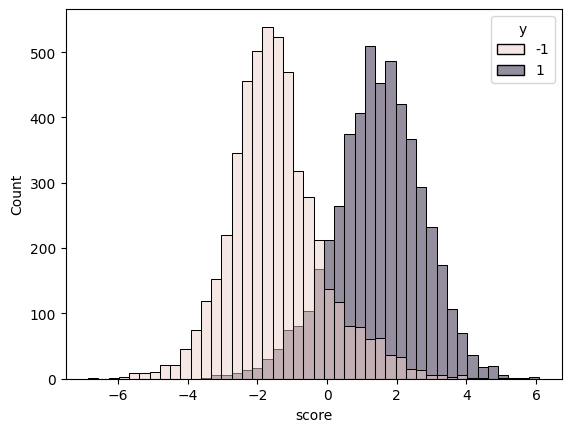

In [3]:
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

score = clf.decision_function(X)
df = pd.DataFrame({'score': score, 'y': y})
sns.histplot(df, x="score", hue="y")
plt.show()